<a href="https://colab.research.google.com/github/fedyaevys/intro-ai/blob/main/DeepSeekAgent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Создание первого AI-агента на базе LLM!

# Шаг 1: Получаем доступ к LLM по API и учимся с ней общаться

In [ ]:
!pip install langgraph langchain langchain-openai langchain_community

## Будем работать с моделями (LLM) через API OpenRouter

OPENROUTER_TOKEN возьмем с сайта openrouter в личном кабинете.

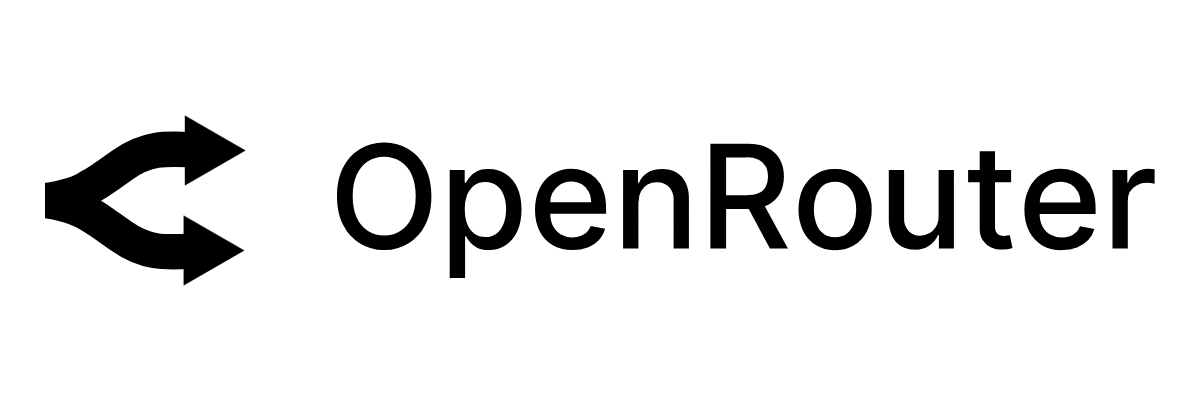

In [ ]:
## токен для доступа к моделям https://openrouter.ai/
# OPENROUTER_TOKEN = "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"
OPENROUTER_TOKEN = "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"

Подключимся к модели DeepSeek

In [ ]:
from langchain_openai import ChatOpenAI

deepseek_llm = ChatOpenAI(
    api_key=OPENROUTER_TOKEN,
    base_url="https://openrouter.ai/api/v1",
    model="deepseek/deepseek-chat-v3.1"
)

deepseek_response = deepseek_llm.invoke("Привет! Как твои дела?").content
print(deepseek_response)

NotFoundError: Error code: 404 - {'error': {'message': 'No endpoints found matching your data policy (Free model publication). Configure: https://openrouter.ai/settings/privacy', 'code': 404}}

Пообщаемся с моделью и выясним, есть ли у нее память?

In [ ]:
question1 = "Сколько лап у паука?"
additional_question = "А зубов?"

print(question1)
print(deepseek_llm.invoke(question1).content)
print(additional_question)
print(deepseek_llm.invoke(additional_question).content)

Сколько лап у паука?
Конечно!

У паука **8 лап** (ног).

Это основное отличие пауков от насекомых, у которых 6 ног.

Небольшое уточнение:
*   Те части, которые часто принимают за дополнительные лапы (возле рта) — это не ноги, а **педипальпы** (ногощупальца). Они служат для осязания и у самцов — для передачи спермы.
*   А спереди у паука есть еще **хелицеры** — это челюсти, которые заканчиваются коготками, часто с ядовитыми железами.

Так что формула проста: **8 ходильных ног + педипальпы + хелицеры**.
А зубов?
Конечно, давайте разберём этот вопрос с разных сторон. Скорее всего, вы имеете в виду один из следующих вариантов.

### 1. Если вопрос про **боль в зубах или зубную боль**

Это самый частый context.

**Что делать?**
1. **Не откладывайте визит к стоматологу.** Это самое главное правило. Сама по себе зубная боль не пройдет, а причина (кариес, пульпит и т.д.) будет усугубляться.
2. **До визита к врачу** можно принять обезболивающее (например, на основе ибупрофена), но обязательно оз

Оформим диалог красиво

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

question1_message = HumanMessage(content=question1)
additional_question_message = HumanMessage(content=additional_question)

answer1_message = AIMessage(content=deepseek_llm.invoke([question1_message]).content)
answer2_message = AIMessage(content=deepseek_llm.invoke([additional_question_message]).content)

question1_message.pretty_print()
answer1_message.pretty_print()
additional_question_message.pretty_print()
answer2_message.pretty_print()

================================ Human Message =================================

Сколько лап у паука?
================================== Ai Message ==================================

Конечно!

У паука **8 лап** (4 пары).

Это основное отличие пауков (отряд Araneae) от насекомых, у которых 6 лап.

Также у пауков есть дополнительные конечности, которые часто путают с лапами:

*   **Хелицеры** (ногощупальца) — 2 штуки. Они похожи на маленькие клешни или коготки и используются для захвата и умерщвления добычи.
*   **Педипальпы** (ногощупальца) — 2 штуки. Выполняют функцию щупалец, а у самцов также служат органом для спаривания.

**Итого:**
*   **Лапы (ходящие конечности): 8**
*   Хелицеры: 2
*   Педипальпы: 2
================================ Human Message =================================

А зубов?
================================== Ai Message ==================================

Конечно!

Если самый главный вопрос — **"А зубов?"**, то, скорее всего, речь идет о знаменитом анекдоте или ме

Памяти - нет. Организуем ее самостоятельно!

In [ ]:
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage

dialogue = []
dialogue.append(question1_message)
dialogue.append(AIMessage(content=deepseek_llm.invoke(dialogue).content))
dialogue.append(additional_question_message)
dialogue.append(AIMessage(content=deepseek_llm.invoke(dialogue).content))

for phrase in dialogue:
    phrase.pretty_print()

================================ Human Message =================================

Сколько лап у паука?
================================== Ai Message ==================================

Конечно!

У паука **8 лап**.

Это основное отличие пауков от насекомых, у которых 6 лап.

Также у пауков есть дополнительные конечности — **хелицеры** (челюсти с коготками, на концах которых открываются протоки ядовитых желез) и **педипальпы** (ногощупальца, используемые для захвата пищи и у самцов — для спаривания). Но их не считают лапами.

Итак:
*   **Лапы (ходильные ноги): 8**
*   Хелицеры: 1 пара
*   Педипальпы: 1 пара
================================ Human Message =================================

А зубов?
================================== Ai Message ==================================

Отличный вопрос! У пауков **нет зубов в привычном нам понимании**.

Вместо этого у них есть совершенно другой и очень эффективный механизм питания. Вот как это работает:

1.  **Хелицеры**: Это не лапы, а ротовые пр

# Шаг 2: Наш первый агент

Задача агента - проста. Говорить над какой страной или над каким материком находится сейчас телескоп Хаббл


Он будет работать в 3 шага:
- 1 - понимать, что нужно: страна или материк
- 2 - получать текущие координаты Хаббла
- 3 - Говорить над чем находится Хаббл


Сначала зададим архитектуру кратковременной памяти/state, через который мы будем передавать данные между шагами

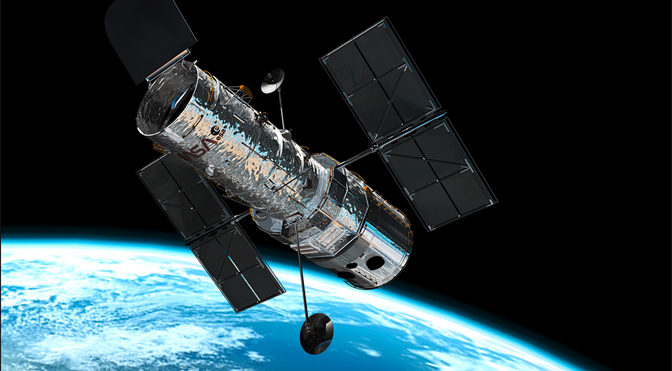

## LangGraph

Для создания агентов мы будем пользоваться фреймворком LangGraph - он позволит нам реализовывать AI-агентов в виде графа из различных состояний.

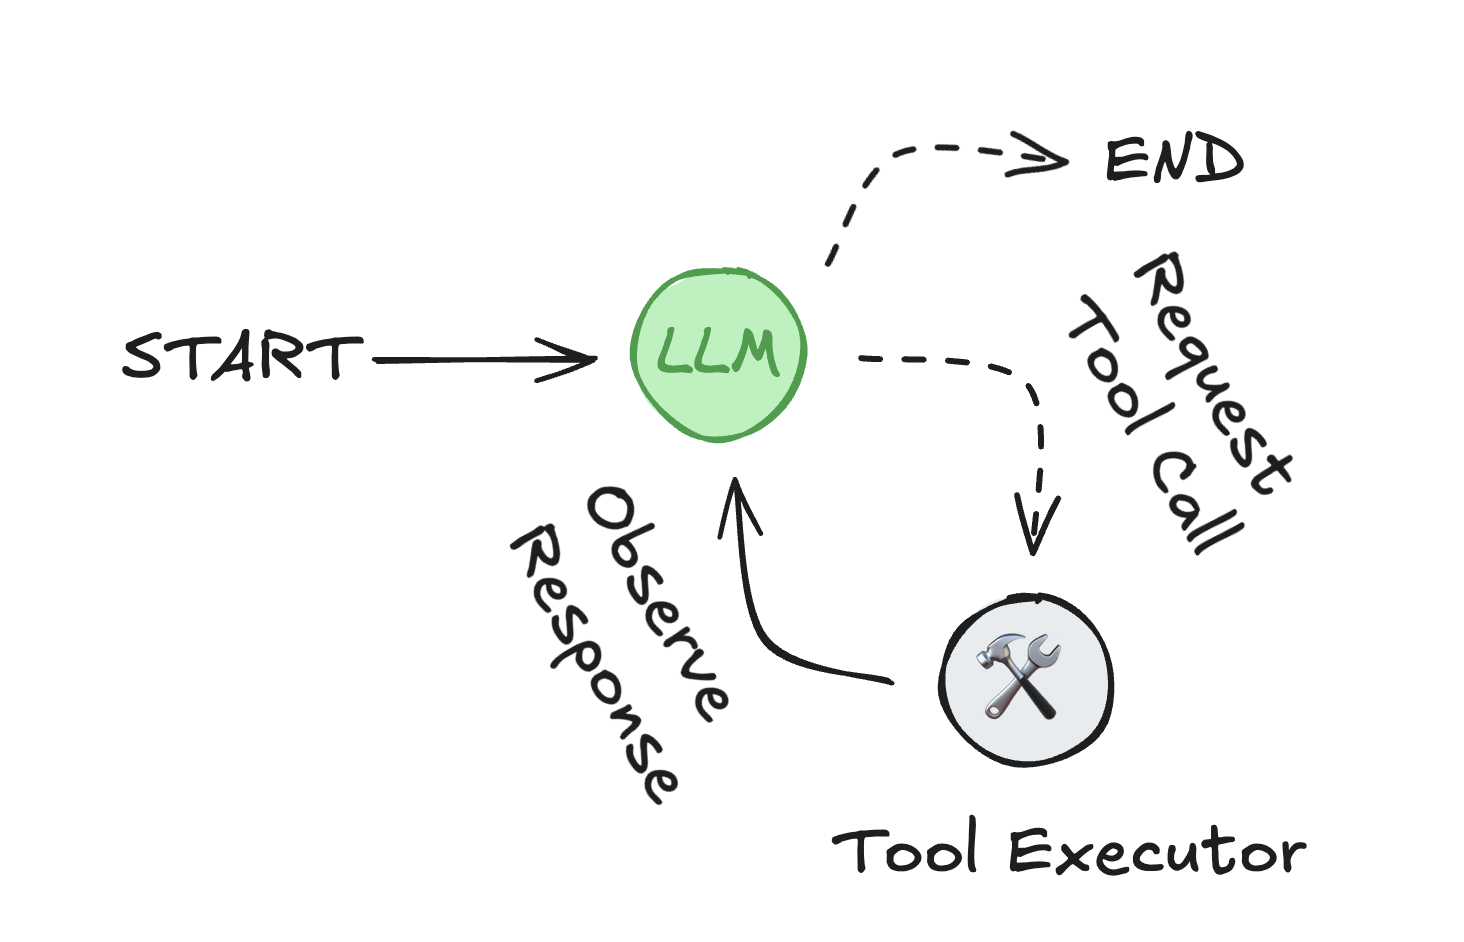

In [ ]:
from typing import TypedDict, List
from langgraph.graph import START, END, StateGraph

class Coordinates(TypedDict):
    lat: float
    long: float

# Define a complete State class with all fields
class HubbleState(TypedDict):
    question: str
    question_kind: int
    coordinates: Coordinates
    latitude: float
    longitude: float
    answer: str

Теперь определим тип вопроса - страна или океан/материк. Решим эту задачу с помощью LLM.

In [ ]:
def get_question_type(state: HubbleState):
    prompt = f"""
# Инструкция
Перед тобой вопрос пользователя к агенту. Тебе нужно классифицировать вопрос на два класса (дополнительный класс 0 - некорректный запрос).
Если вопрос касается страны, над которой находится Hubble - верни 1,
если касается материка или океана - верни 2,
если прочего - верни 0.
Напиши только одно число, не пиши никаких коментариев. Не размышляй
# Примеры
Пример 1
Вопрос: Над какой страной пролетает Hubble?
Ответ: 1
------
Пример 2
Вопрос: Над каким океаном пролетает Hubble?
Ответ: 2
------
Пример 2
Вопрос: Сколько космонавтов на Hubble?
Ответ: 0
------
# Вопрос пользователя, который нужно классифицировать
{state['question']}
    """

    result = deepseek_llm.invoke(prompt).content

    print("get_question_type result:", result)
    try:
        question_kind = int(result)
    except:
        question_kind = 0

    print("State after get_question_type:", {"question": state.get('question'), "question_kind": question_kind})
    return {"question_kind": question_kind}

Теперь получим координаты Хаббла - по API!

In [ ]:
import requests

def get_hubble_location(state: HubbleState):
    """
    Получает текущие координаты космического телескопа Hubble (NORAD ID 20580)
    через API N2YO и сохраняет их в state["coordinates"].

    Параметры:
        state (dict): текущее состояние агента
        api_key (str): ваш API ключ для https://www.n2yo.com/api/

    Возвращает:
        dict: обновлённое состояние с координатами
    """
    print("State entering get_hubble_location:", state)

    # NORAD ID телескопа Hubble
    hubble_id = 20580

    # Позиция наблюдателя не влияет на результат (можно поставить 0,0)
    observer_lat, observer_lng, observer_alt = 0, 0, 0

    # Формируем запрос
    url = (
        f"https://api.n2yo.com/rest/v1/satellite/positions/"
        f"{hubble_id}/{observer_lat}/{observer_lng}/{observer_alt}/1/&apiKey=H5PVMJ-JNBSX9-JSLXLG-5L8S"
    )

    response = requests.get(url)
    response.raise_for_status()
    data = response.json()

    # Проверка и извлечение координат
    if "positions" not in data or not data["positions"]:
        raise ValueError("Не удалось получить данные о координатах Hubble.")

    position = data["positions"][0]
    latitude = position["satlatitude"]
    longitude = position["satlongitude"]

    print("Hubble coordinates:", latitude, longitude)

    # Обновляем состояние
    state["coordinates"] = {"lat": latitude, "long": longitude}
    return state

Теперь напишем шаг, который будет по координатам возвращать требуемый ответ

In [ ]:
def get_answer(state: HubbleState):
    print("Full state entering get_answer:", state)

    # Check if coordinates are in the state
    if "coordinates" not in state:
        print("ERROR: Missing coordinates in state")
        return {"answer": "Ошибка: Не удалось получить координаты Hubble"}

    lat = state["coordinates"]["lat"]
    long = state["coordinates"]["long"]

    if state["question_kind"] == 1:
        prompt = f"Над какой страной пролетает Hubble, если я запросил координаты над которыми она находится и они равны:({lat},{long})?"
    elif state["question_kind"] == 2:
        prompt = f"Над каким материком или океаном пролетает Hubble, если я запросил координаты над которыми она находится и они равны: ({lat},{long})?"
    else:
        prompt = f"Напиши в ответе: ОШИБКА, ЗАДАЙТЕ КОРРЕКТНЫЙ ЗАПРОС"

    result = deepseek_llm.invoke(prompt).content
    print("get_answer result:", result)
    return {"answer": result}

А теперь соберем весь граф размышлений. Сначала создадим вершины, потом соединим их ребрами.

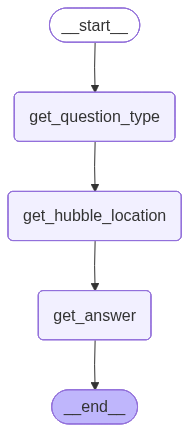

In [ ]:
graph_builder = StateGraph(HubbleState)

graph_builder.add_node("get_question_type", get_question_type)
graph_builder.add_node("get_hubble_location", get_hubble_location)
graph_builder.add_node("get_answer", get_answer)

graph_builder.add_edge(START, "get_question_type")
graph_builder.add_edge("get_question_type", "get_hubble_location")
graph_builder.add_edge("get_hubble_location", "get_answer")
graph_builder.add_edge("get_answer", END)

graph = graph_builder.compile()
graph

Проверим, как работает!

На вход такому агенту нужно подавать State или его кусочек.

In [ ]:
answer1 = graph.invoke({"question":"Над какой страной пролетает Hubble?"})["answer"]
print('---------------')
print(answer1)

get_question_type result: 1
State after get_question_type: {'question': 'Над какой страной пролетает Hubble?', 'question_kind': 1}
State entering get_hubble_location: {'question': 'Над какой страной пролетает Hubble?', 'question_kind': 1}
Hubble coordinates: 23.18664713 43.50733065
Full state entering get_answer: {'question': 'Над какой страной пролетает Hubble?', 'question_kind': 1, 'coordinates': {'lat': 23.18664713, 'long': 43.50733065}}
get_answer result: Отличный вопрос! Это позволяет развеять распространенное заблуждение.

**Непосредственно над Hubble в данный момент не находится никакая страна.**

Координаты, которые вы указали (23.18664713° северной широты, 43.50733065° восточной долготы), указывают на точку **над пустыней в северной части Саудовской Аравии**, примерно в 200 км к востоку от города Эль-Ула.

**Однако важно понять, почему это не совсем верно:**

1.  **Высота полета Hubble**: Телескоп Хаббл находится на низкой околоземной орбите на высоте примерно **535 километров

In [ ]:
answer2 = graph.invoke({"question":"Над каким океаном пролетает Hubble?"})["answer"]
print('---------------')
print(answer2)

get_question_type result: 2
State after get_question_type: {'question': 'Над каким океаном пролетает Hubble?', 'question_kind': 2}
State entering get_hubble_location: {'question': 'Над каким океаном пролетает Hubble?', 'question_kind': 2}
Hubble coordinates: 24.67267287 48.78307742
Full state entering get_answer: {'question': 'Над каким океаном пролетает Hubble?', 'question_kind': 2, 'coordinates': {'lat': 24.67267287, 'long': 48.78307742}}
get_answer result: Отличный вопрос! Это прекрасный пример того, как космические аппараты на низкой орбите быстро меняют свое положение.

Координаты, которые вы указали (**широта ~24.67° с.ш., долгота ~48.78° в.д.**), указывают на то, что в данный момент телескоп «Хаббл» пролетает над **материком**, а именно над **Аравийским полуостровом**.

Более точно, эти координаты находятся на территории **королевства Саудовская Аравия**, в его восточной части, недалеко от побережья Персидского залива.

### Почему не океан?

*   **48.78° в.д.** — это долгота, ко

In [ ]:
answer3 = graph.invoke({"question":"Над какой страной пролетает Хаббл и cколько лет прожил Лев Толстой?"})["answer"]
print('---------------')
print(answer3)

get_question_type result: 0
State after get_question_type: {'question': 'Над какой страной пролетает Хаббл и cколько лет прожил Лев Толстой?', 'question_kind': 0}
State entering get_hubble_location: {'question': 'Над какой страной пролетает Хаббл и cколько лет прожил Лев Толстой?', 'question_kind': 0}
Hubble coordinates: 25.13670348 50.63392172
Full state entering get_answer: {'question': 'Над какой страной пролетает Хаббл и cколько лет прожил Лев Толстой?', 'question_kind': 0, 'coordinates': {'lat': 25.13670348, 'long': 50.63392172}}
get_answer result: ОШИБКА, ЗАДАЙТЕ КОРРЕКТНЫЙ ЗАПРОС
---------------
ОШИБКА, ЗАДАЙТЕ КОРРЕКТНЫЙ ЗАПРОС
